In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [1]:
import requests
url = 'https://county.milwaukee.gov/files/county/county-clerk/Election-Commission/ElectionResultsCopy-1/2016Copy-1/Fall-General-ElectionCopy-1/wardbywardEL30Copy-1.txt'

In [3]:
headers = {'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
           "(KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"}
r = requests.get(url, headers=headers)

In [7]:
import re

In [5]:
bs_data = bs(r.text, 'html.parser')

In [57]:
p = re.compile(r'(?<=Donald J. Trump \/ \(REP\).  .  .  .  .  .  .)\s+\d+(?=\s)')

In [58]:
donald_votes = p.findall(r.text)

In [59]:
len(donald_votes)

478

In [60]:
p2 = re.compile(r'(?<=Hillary Clinton \/ \(DEM\).  .  .  .  .  .  .)\s+\d+(?=\s)')

In [61]:
hillary_votes = p2.findall(r.text)

In [62]:
len(hillary_votes)

478

In [87]:
p3 = re.compile(r'(?<=Darrell L\. Castle \/ \(CON\) .  .  .  .  .  .)\s+\d+(?=\s)')

In [88]:
darrell_votes = p3.findall(r.text)

In [89]:
len(darrell_votes)

478

In [90]:
p4 = re.compile(r'(?<=Gary Johnson \/ \(LIB\).  .  .  .  .  .  .  .)\s+\d+(?=\s)')

In [91]:
gary_votes = p4.findall(r.text)

In [92]:
len(gary_votes)

478

In [93]:
wards_dict = {'Donald Trump':donald_votes, 'Hillary Clinton':hillary_votes, 'Darrell Castle':darrell_votes, 'Gary Johnson':gary_votes}

In [94]:
wards_dict

{'Donald Trump': ['    222',
  '     30',
  '    177',
  '    204',
  '    110',
  '    361',
  '    167',
  '    311',
  '     97',
  '    266',
  '    153',
  '    104',
  '     88',
  '     56',
  '    221',
  '    140',
  '    122',
  '    133',
  '     90',
  '     87',
  '     45',
  '     74',
  '     37',
  '     16',
  '     75',
  '     55',
  '     64',
  '     24',
  '     34',
  '     81',
  '     61',
  '    238',
  '    687',
  '    254',
  '    242',
  '     84',
  '     73',
  '     44',
  '     92',
  '     44',
  '     49',
  '     62',
  '     13',
  '     73',
  '     61',
  '     21',
  '     41',
  '     35',
  '     38',
  '     32',
  '     17',
  '     40',
  '     16',
  '     12',
  '    166',
  '     12',
  '     15',
  '     26',
  '     28',
  '     13',
  '     19',
  '     15',
  '      8',
  '     31',
  '     41',
  '     10',
  '     18',
  '     77',
  '     46',
  '     59',
  '     32',
  '     61',
  '     89',
  '     63',
  '    133',
  '     5

In [95]:
votes_data = pd.DataFrame(wards_dict)

In [96]:
votes_data.head()

,Donald Trump,Hillary Clinton,Darrell Castle,Gary Johnson
0,222,932,7,12
1,30,361,2,3
2,177,762,3,12
3,204,1325,3,26
4,110,633,3,6


In [98]:
# convert to int
votes_data['Donald Trump'] = votes_data['Donald Trump'].astype(int)
votes_data['Hillary Clinton'] = votes_data['Hillary Clinton'].astype(int)
votes_data['Darrell Castle'] = votes_data['Darrell Castle'].astype(int)
votes_data['Gary Johnson'] = votes_data['Gary Johnson'].astype(int)


Text(0.5, 0.98, 'Milwaukee')

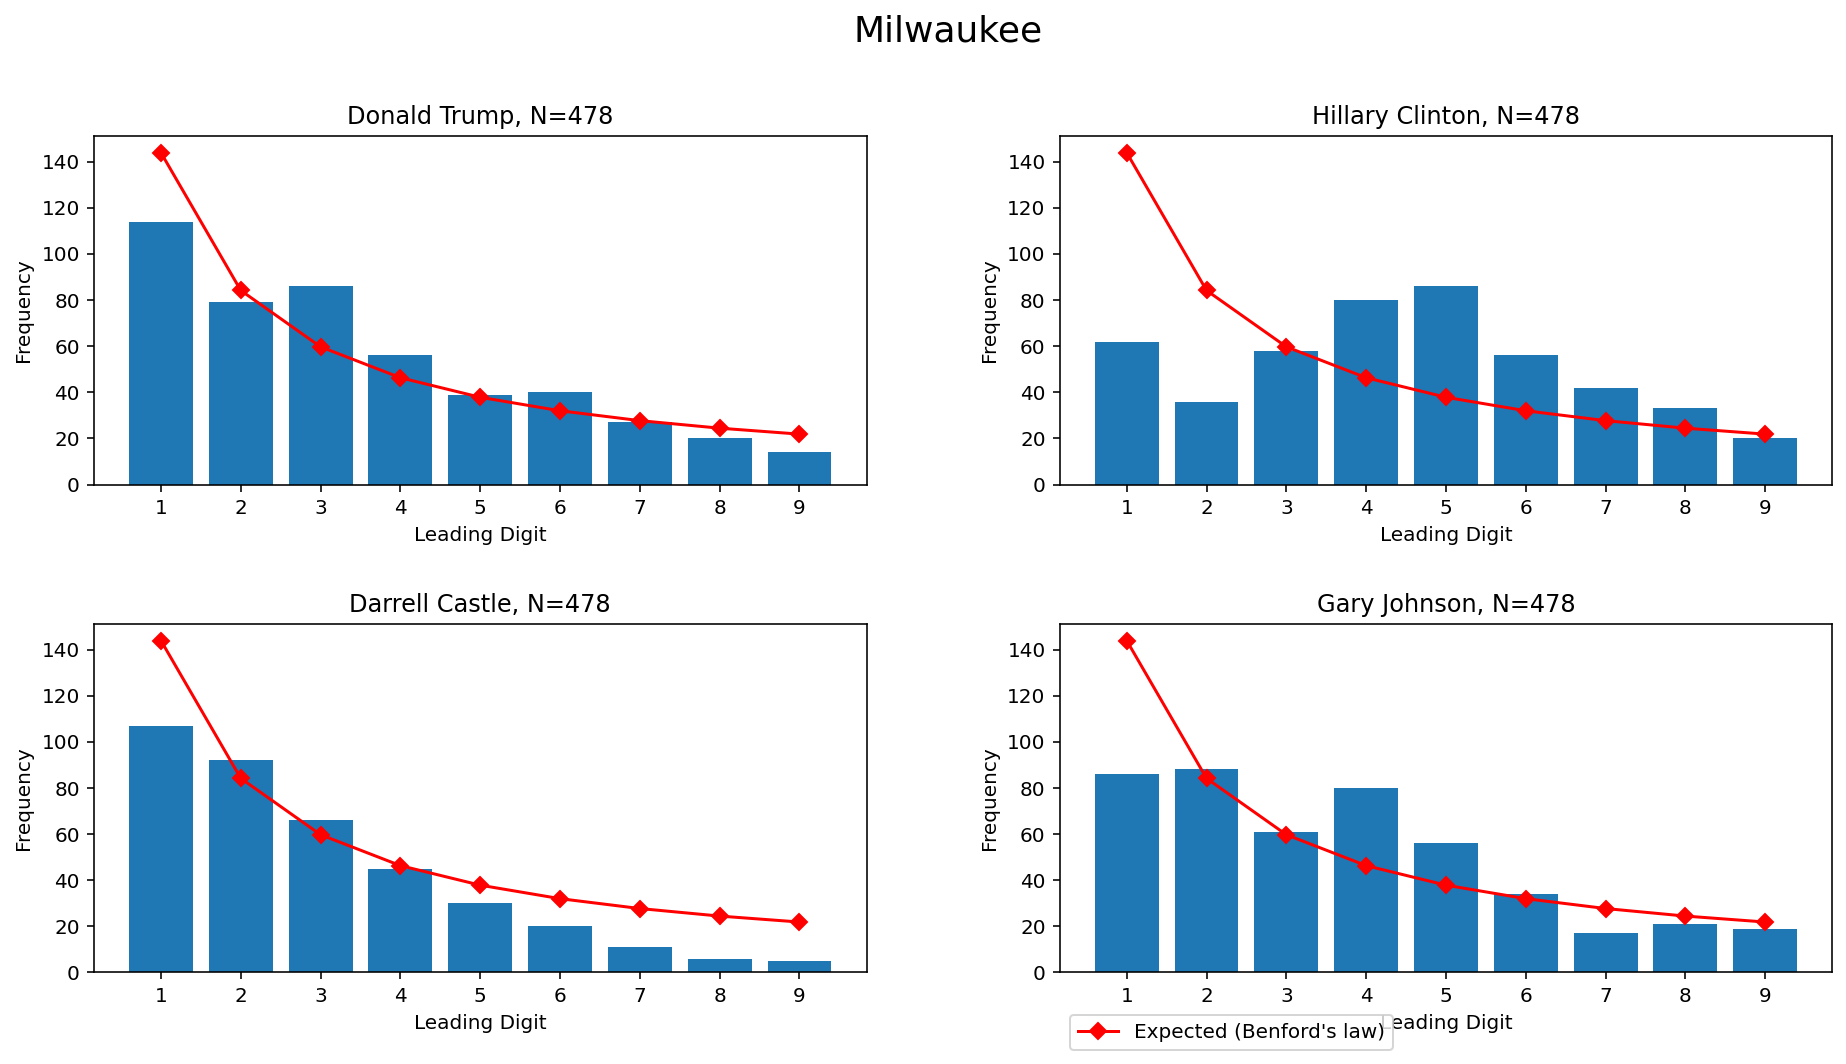

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.subplots_adjust(hspace=0.4, wspace=0.25)
    
axs = np.array(axs).flatten()
candidates = list(votes_data.columns)

# benford's law
digit = np.arange(1, 10)

for i in range(len(axs)):

    ax = axs[i]
    candidate = candidates[i]
    
    N = 478
    expected = np.log10(1 + 1/digit)*N
    
    digits = votes_data[candidate].astype(str).str[0].astype(int)
    digits = digits[digits > 0]
    
    v = digits.value_counts()
    ax.bar(v.index, v.values)
    ax.set_xticks(range(1, 10))
    
    ax.plot(digit, expected, marker='D', color='red', label='Expected (Benford\'s law)')
    
    ax.set_title("%s, N=%d" % (candidate, N))
    ax.set_xlabel("Leading Digit")
    ax.set_ylabel("Frequency")

plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))
plt.suptitle("Milwaukee", fontsize=18)
    